# Basics of ARIMA Models With Statsmodels in Python

In [36]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

## Data

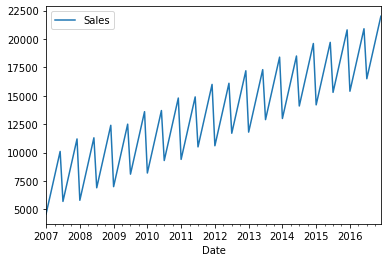

In [75]:
sales = pd.read_csv('salesdata.csv')
sales.index = pd.to_datetime(sales["Date"])
sales.plot()

## Correlogram - Sationarity Check

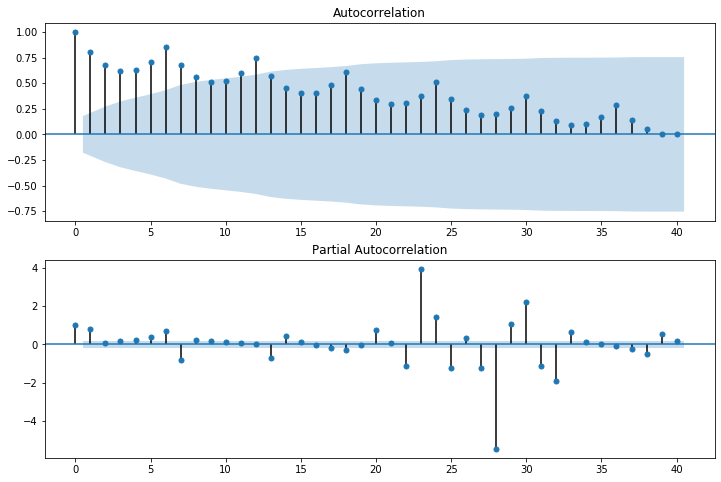

In [38]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sales['Sales'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sales['Sales'], lags=40, ax=ax2)
#plt.show()

In [46]:
print(sm.tsa.stattools.adfuller(sales["Sales"]))

(-1.7912074605859998, 0.3848356001512284, 13, 106, {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}, -5260.226008875569)


In [44]:
class StationarityTests:
    def __init__(self, significance=.05):
        self.SignificanceLevel = significance
        self.pValue = None
        self.isStationary = None
    
    def ADF_Stationarity_Test(self, timeseries, printResults = True):
        #Dickey-Fuller test:
        adfTest = sm.tsa.stattools.adfuller(timeseries, autolag='AIC')
        
        
        self.pValue = adfTest[1]
        
        if (self.pValue<self.SignificanceLevel):
            self.isStationary = True
        else:
            self.isStationary = False
        
        if printResults:
            dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])
            #Add Critical Values
            for key,value in adfTest[4].items():
                dfResults['Critical Value (%s)'%key] = value
            print('Augmented Dickey-Fuller Test Results:')
            print(dfResults)

In [45]:
sTest = StationarityTests()
sTest.ADF_Stationarity_Test(sales["Sales"], printResults = True)
print("Is the time series stationary? {0}".format(sTest.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic       -1.791207
P-Value                   0.384836
# Lags Used              13.000000
# Observations Used     106.000000
Critical Value (1%)      -3.493602
Critical Value (5%)      -2.889217
Critical Value (10%)     -2.581533
dtype: float64
Is the time series stationary? False


In [57]:
ds = sales['Sales'].diff().dropna()

Date
2007-02-01    1100.0
2007-03-01    1100.0
2007-04-01    1100.0
2007-05-01    1100.0
2007-06-01    1100.0
               ...  
2016-08-01    1100.0
2016-09-01    1100.0
2016-10-01    1100.0
2016-11-01    1100.0
2016-12-01    1100.0
Name: Sales, Length: 119, dtype: float64

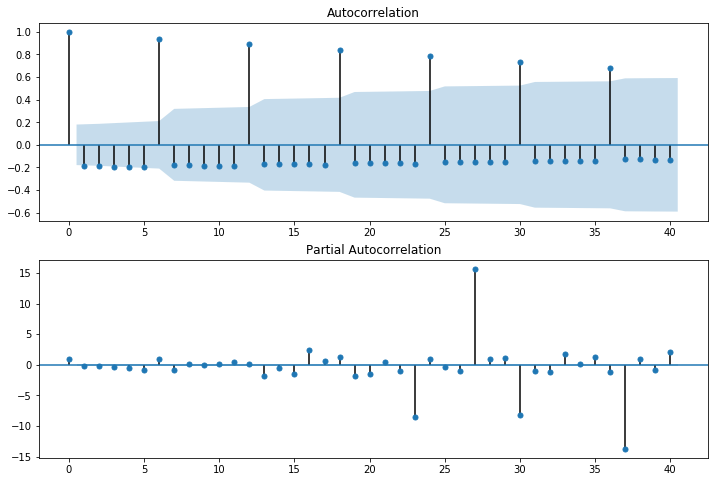

In [59]:
# first difference = ds
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ds, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ds, lags=40, ax=ax2)

we’ll give an ARIMA(0,1,6)

## Model

In [61]:
model=sm.tsa.ARIMA(endog=sales['Sales'],order=(0,1,6))
results=model.fit()
print(results.summary())

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:160: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:160: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                  119
Model:                 ARIMA(0, 1, 6)   Log Likelihood               -1002.613
Method:                       css-mle   S.D. of innovations           1011.299
Date:                Fri, 22 Nov 2019   AIC                           2021.226
Time:                        15:11:32   BIC                           2043.459
Sample:                    02-01-2007   HQIC                          2030.254
                         - 12-01-2016                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           101.6074      4.979     20.407      0.000      91.849     111.366
ma.L1.D.Sales    -0.5296      0.068     -7.826      0.000      -0.662      -0.397
ma.L2.D.Sales    -0.2231      0.063     

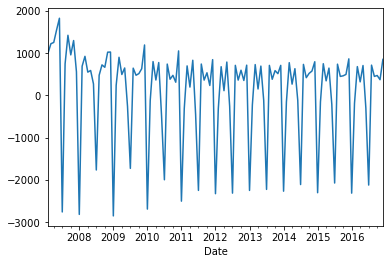

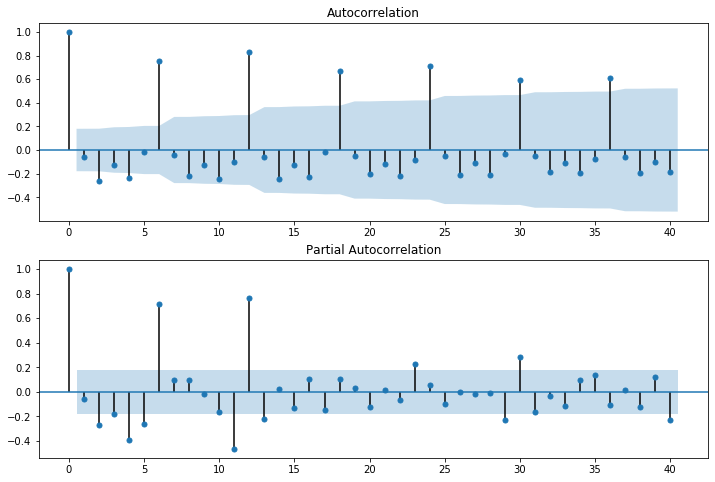

In [62]:
results.resid.plot()


fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(results.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(results.resid, lags=40, ax=ax2)

Not a good fit

In [73]:
model2=sm.tsa.ARIMA(endog=sales['Sales'],order=(4,1,0))
results2=model2.fit()
print(results2.summary())

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:160: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:160: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                  119
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -1057.944
Method:                       css-mle   S.D. of innovations           1746.112
Date:                Fri, 22 Nov 2019   AIC                           2127.888
Time:                        15:22:11   BIC                           2144.563
Sample:                    02-01-2007   HQIC                          2134.659
                         - 12-01-2016                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           119.3299     56.464      2.113      0.035       8.662     229.998
ar.L1.D.Sales    -0.4687      0.081     -5.799      0.000      -0.627      -0.310
ar.L2.D.Sales    -0.4688      0.081     

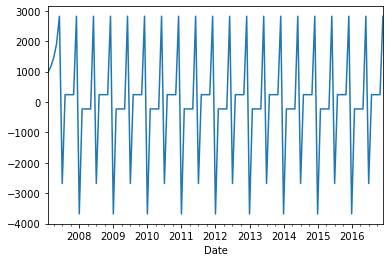

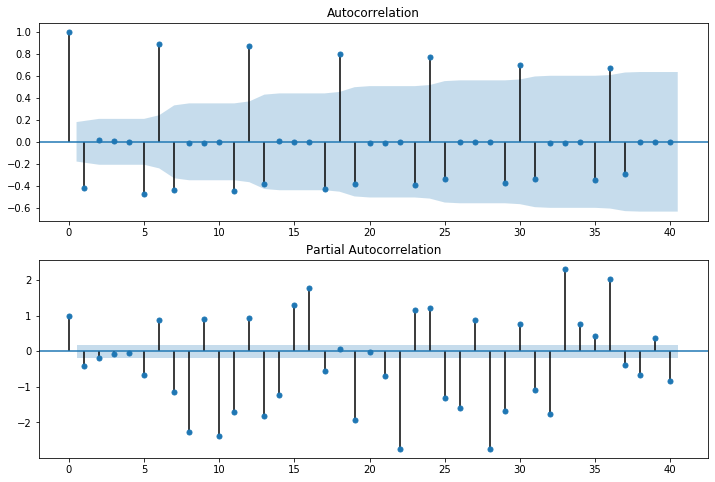

In [74]:
results2.resid.plot()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(results2.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(results2.resid, lags=40, ax=ax2)

### Seasonality Issues